In [2]:
import bids
import nilearn
from nilearn import image as nimg
from nilearn import plotting as nplot
import numpy as np
import pandas as pd
from bids import BIDSLayout
from nilearn.connectome import ConnectivityMeasure
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import input_data
from nilearn import datasets

/home/nimhans/.local/lib/python3.10/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [3]:
# fmriprep output --> nilearn input
base_dir = '/home/nimhans/projects/data/PD_SERB/test_data/derivatives/fmriprep/v20.2.7/output/fmriprep/'
layout = bids.BIDSLayout(f"{base_dir}", config=['bids','derivatives'])


In [4]:
mni_preproc_T1 = layout.get(datatype='anat',desc='preproc',extension='.nii.gz',space='MNI152NLin2009cAsym')
mni_preproc_T1


[<BIDSImageFile filename='/home/nimhans/projects/data/PD_SERB/test_data/derivatives/fmriprep/v20.2.7/output/fmriprep/sub-BLR03/ses-01/anat/sub-BLR03_ses-01_space-MNI152NLin2009cAsym_res-2_desc-preproc_T1w.nii.gz'>,
 <BIDSImageFile filename='/home/nimhans/projects/data/PD_SERB/test_data/derivatives/fmriprep/v20.2.7/output/fmriprep/sub-SERB001/ses-01/anat/sub-SERB001_ses-01_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_T1w.nii.gz'>]

In [5]:
layout.get_subjects()


['BLR03', 'SERB001']

In [6]:
fmriprep_dir = '/home/nimhans/projects/data/PD_SERB/test_data/derivatives/fmriprep/v20.2.7/output/fmriprep/'
layout= BIDSLayout(fmriprep_dir, config=['bids','derivatives'])

subject = "BLR03"

T1w_files = layout.get(subject=subject, datatype='anat',
					   desc='preproc', extension='.nii.gz',
					   return_type='file')
					   
brainmask_files = layout.get(subject=subject, datatype='anat', suffix="mask",
                             desc='brain', extension='.nii.gz',
                             return_type='file')

In [7]:
T1w_files

['/home/nimhans/projects/data/PD_SERB/test_data/derivatives/fmriprep/v20.2.7/output/fmriprep/sub-BLR03/ses-01/anat/sub-BLR03_ses-01_desc-preproc_T1w.nii.gz',
 '/home/nimhans/projects/data/PD_SERB/test_data/derivatives/fmriprep/v20.2.7/output/fmriprep/sub-BLR03/ses-01/anat/sub-BLR03_ses-01_space-MNI152NLin2009cAsym_res-2_desc-preproc_T1w.nii.gz']

In [8]:
t1 = T1w_files[0]
bm = brainmask_files[0]

t1_img = nimg.load_img(t1)
bm_img = nimg.load_img(bm)



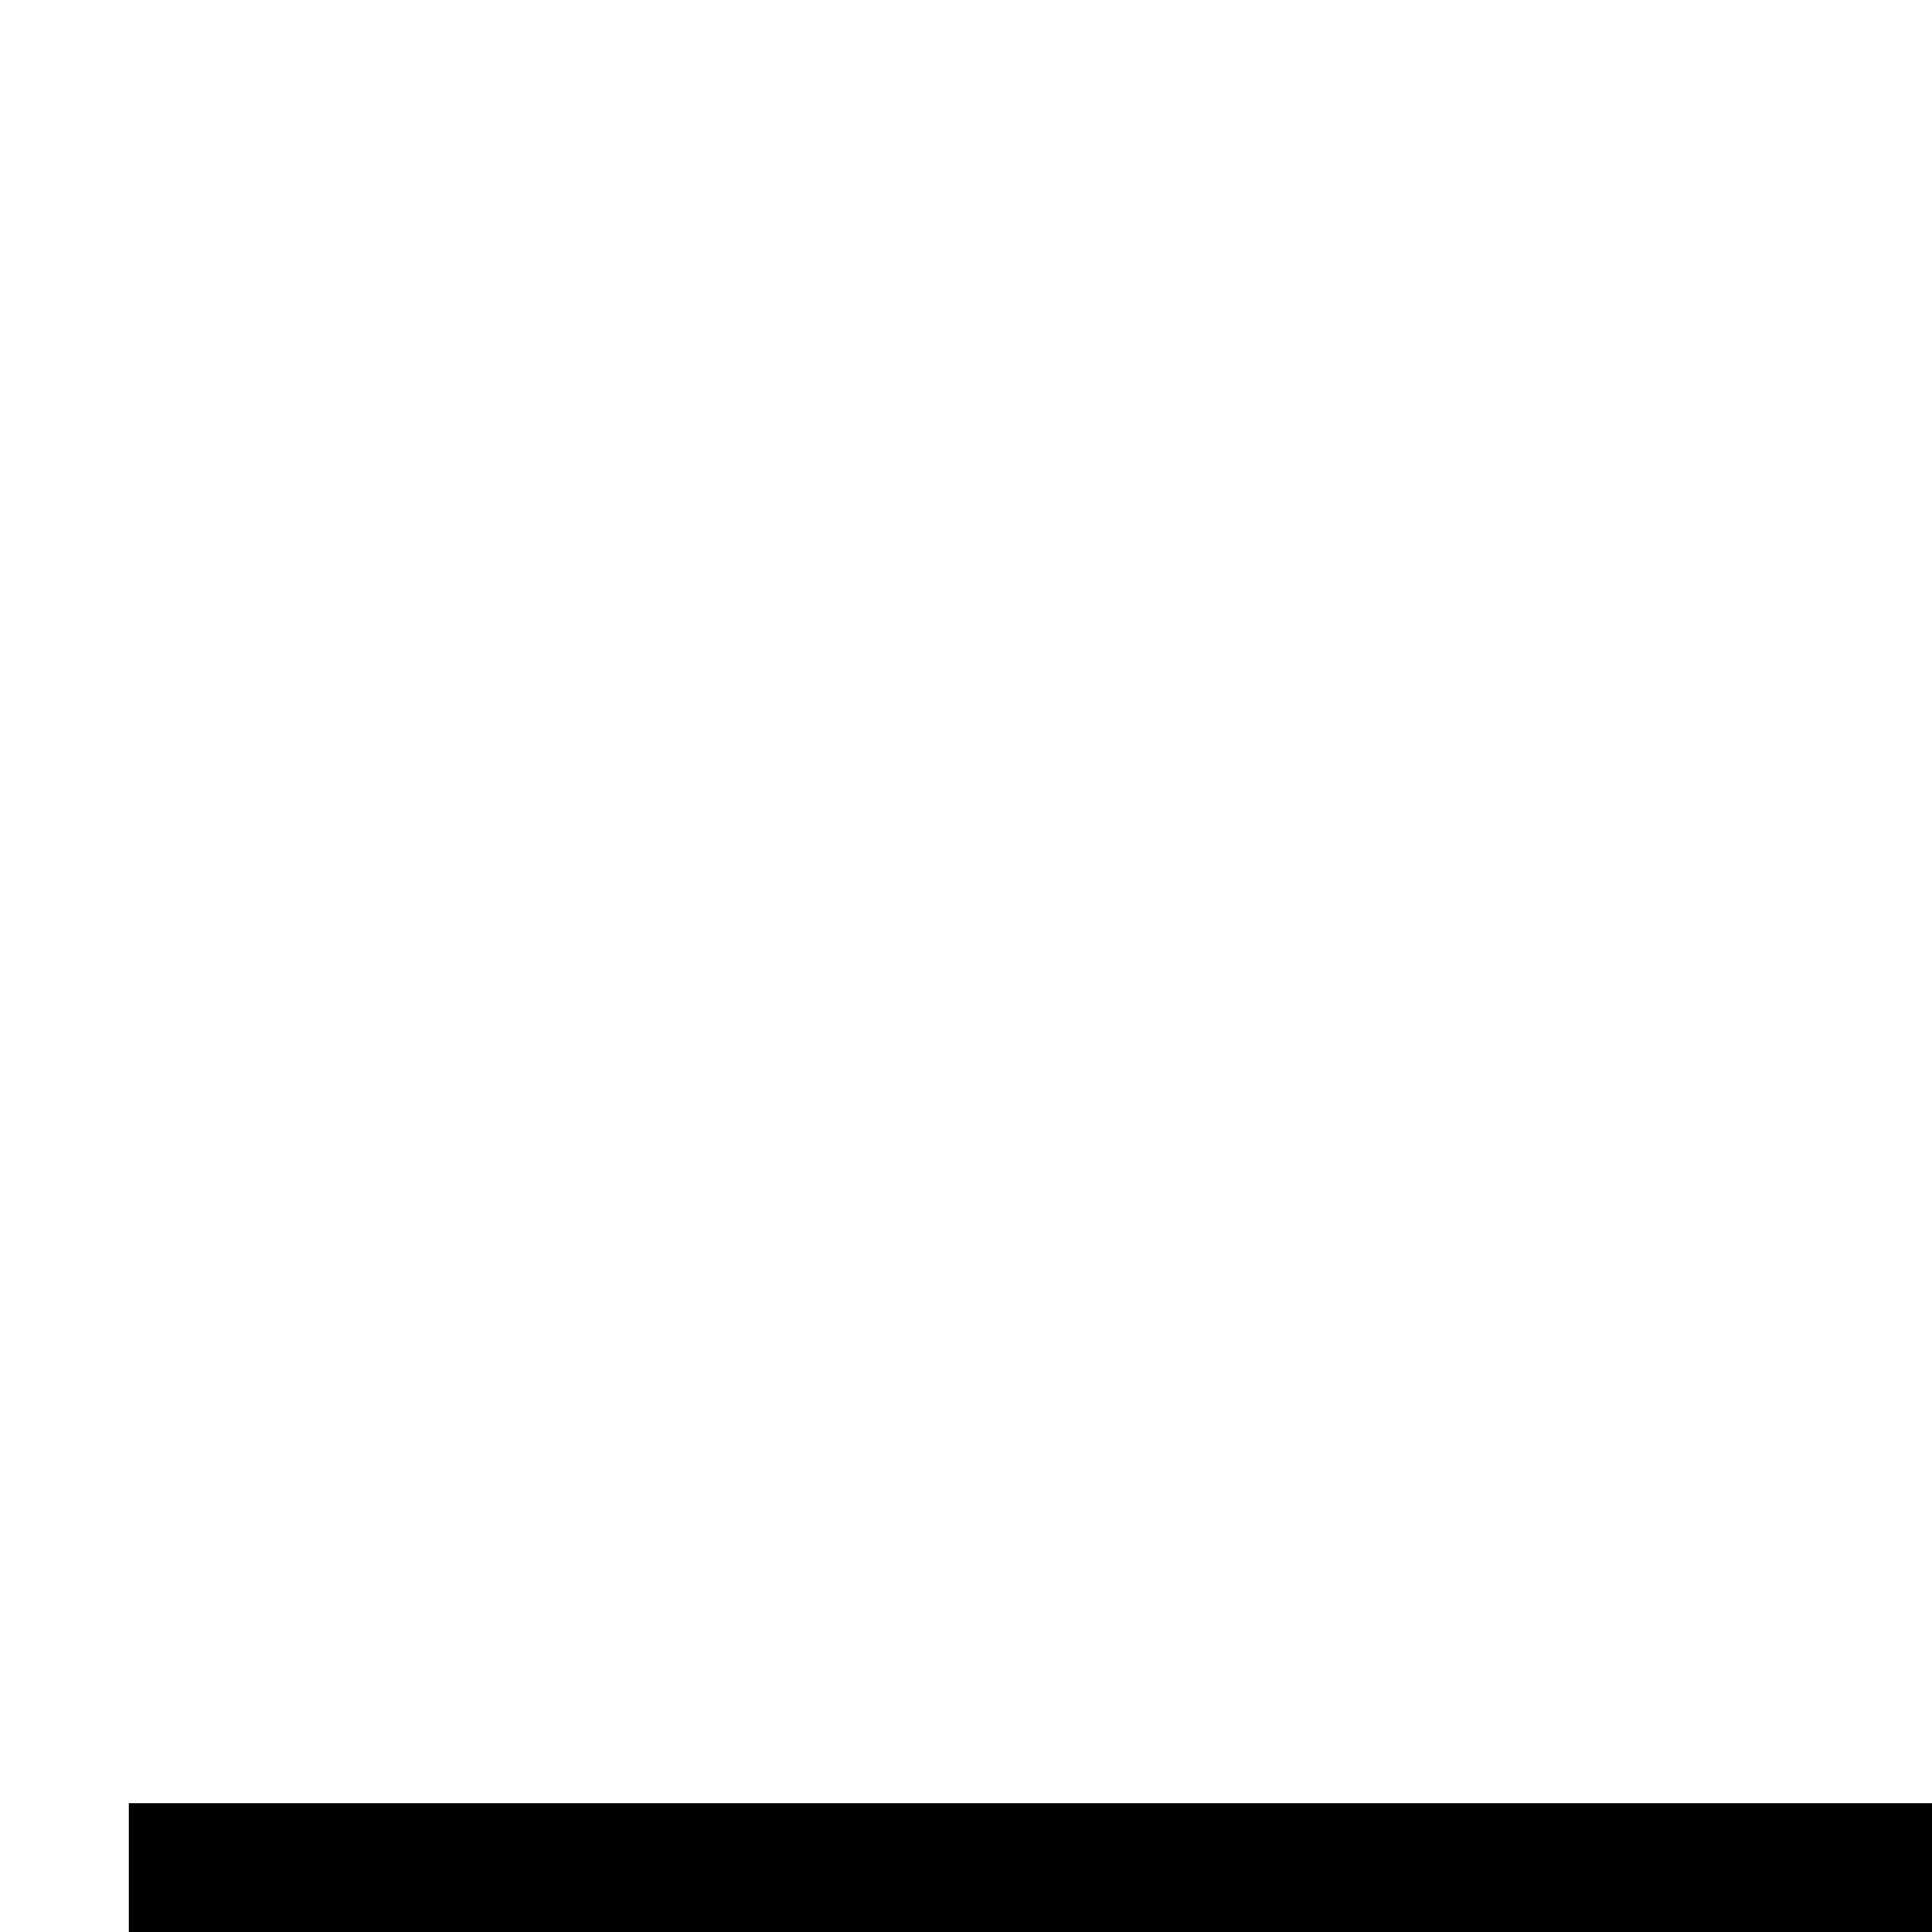
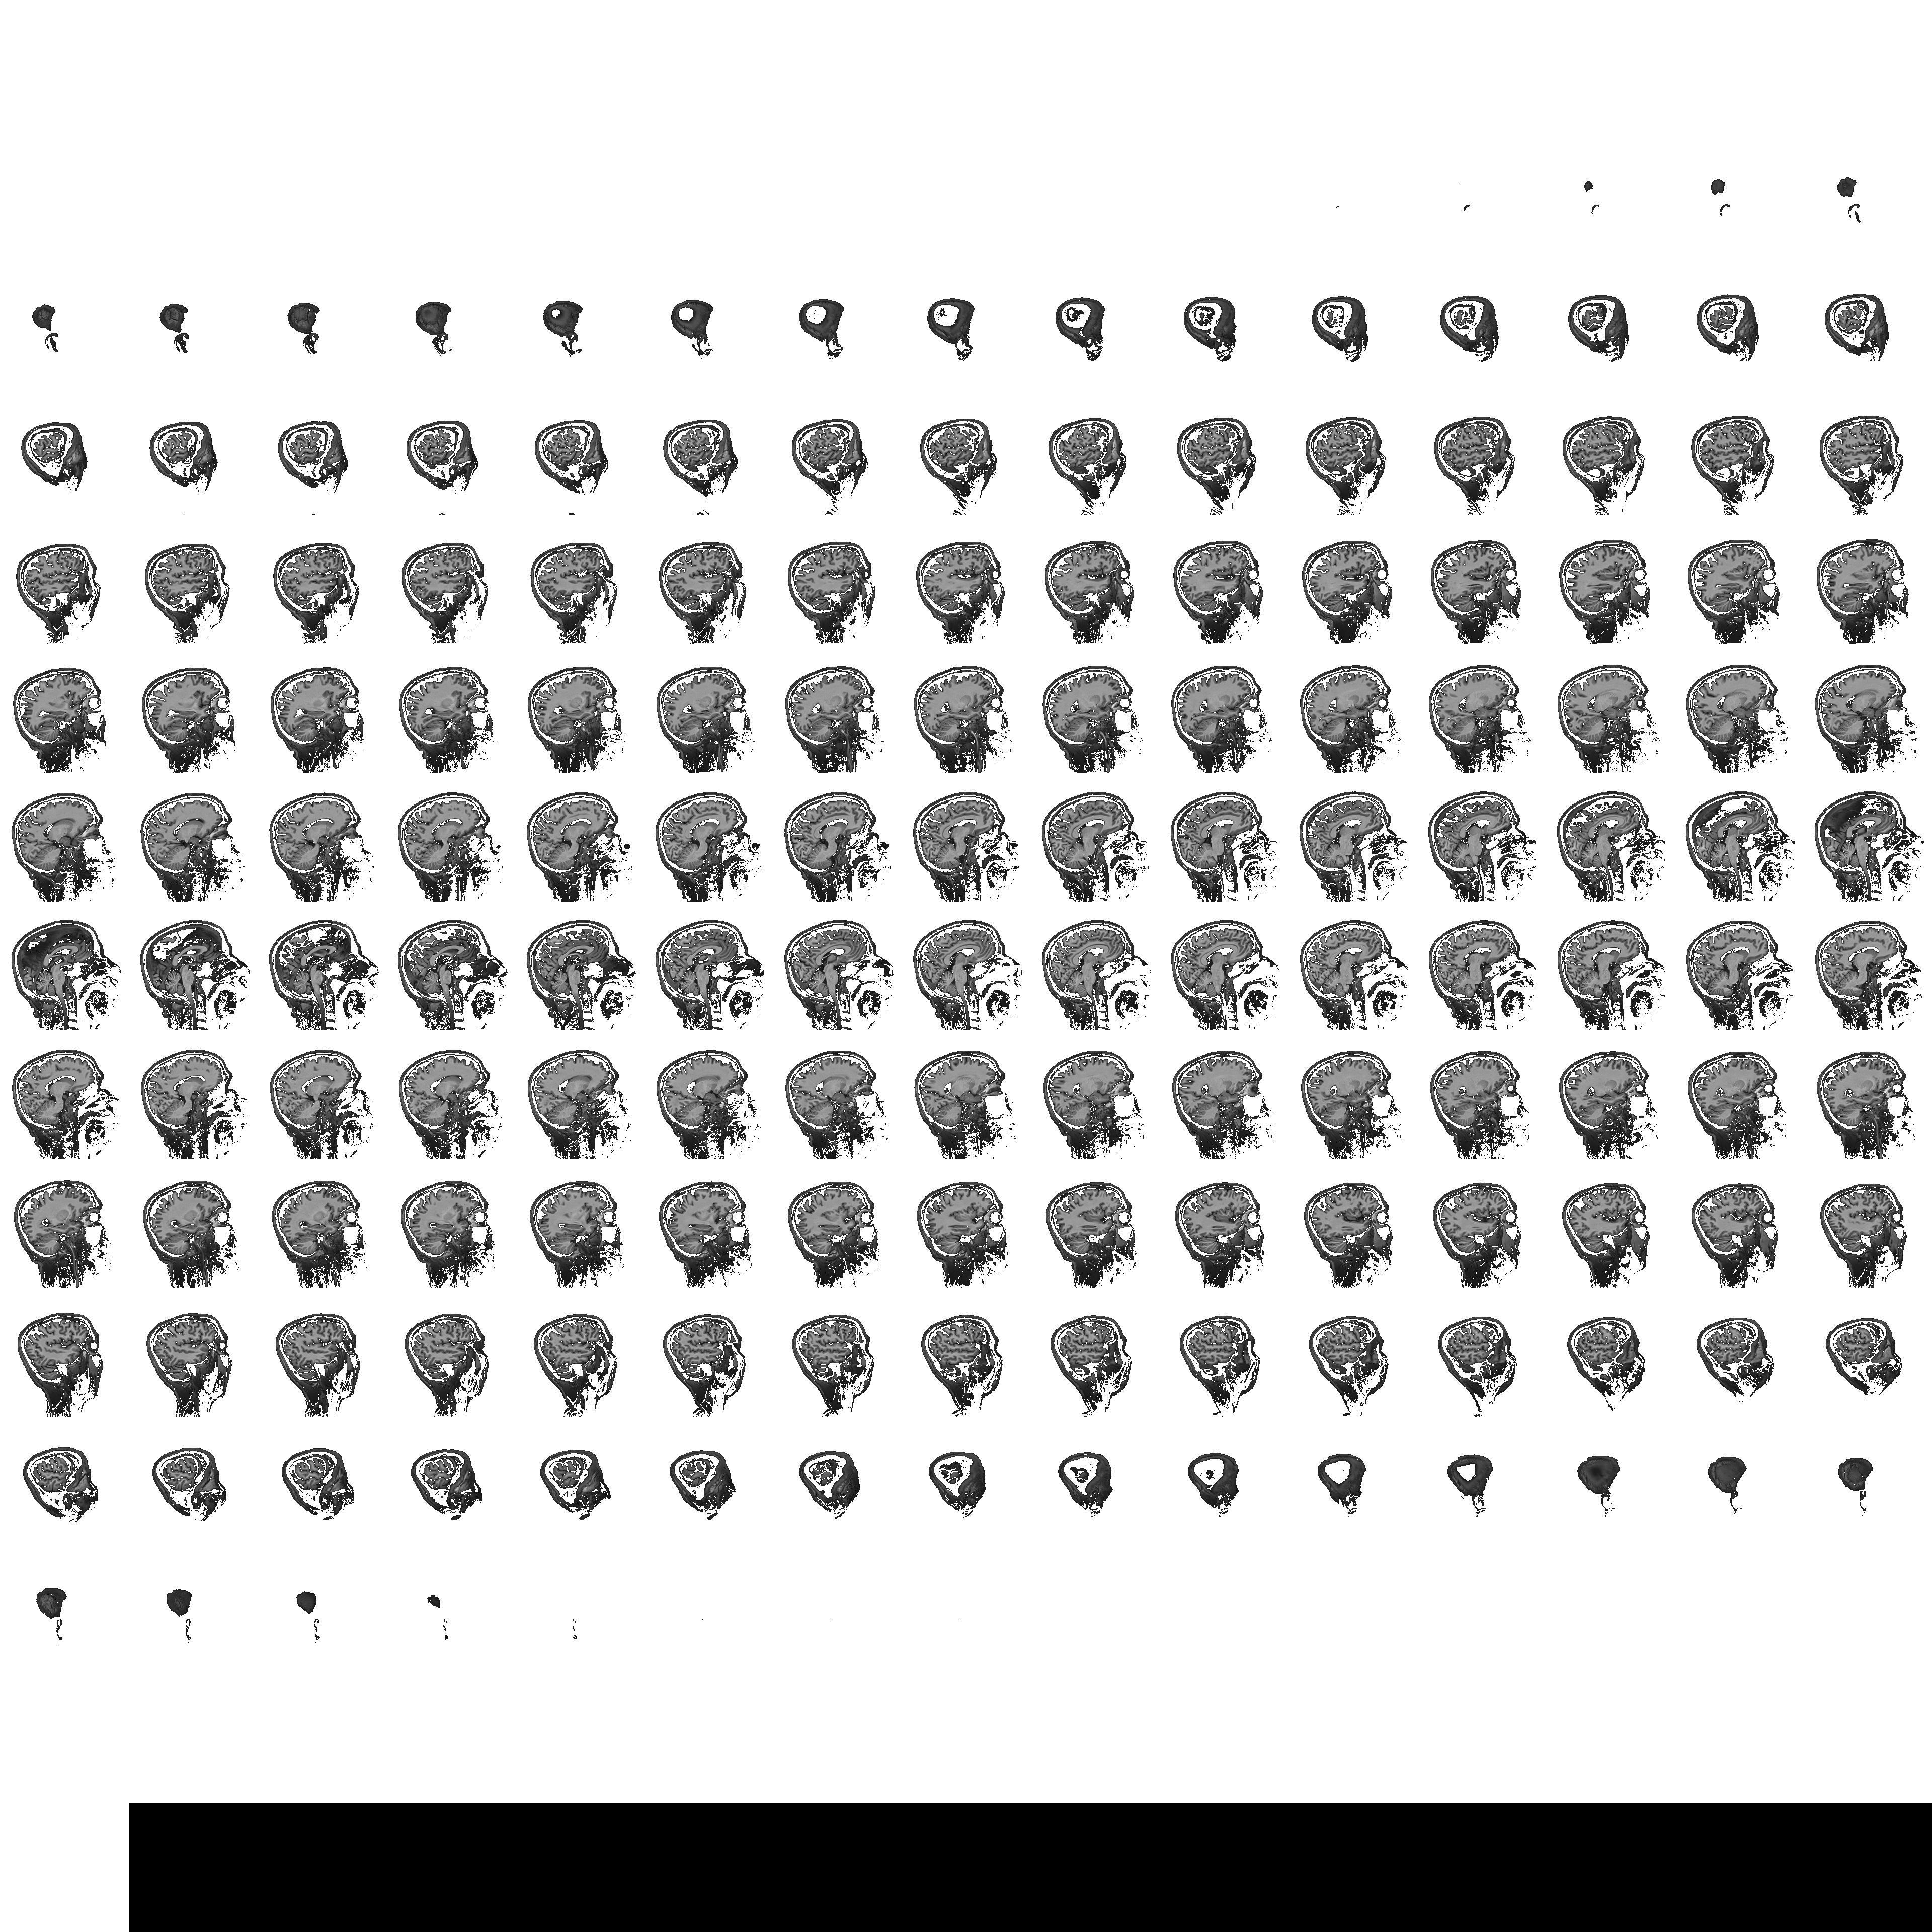

In [7]:
nplot.view_img(t1_img,
               bg_img=False, # Disable using a standard image as the background
               cmap='Greys_r', # Set color scale so white matter appears lighter than grey
               symmetric_cmap=False, # We don't have negative values
               threshold="auto", # Clears out the background
              )


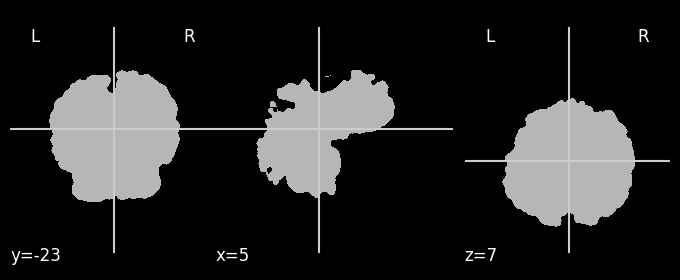

In [8]:
nplot.plot_anat(bm_img)

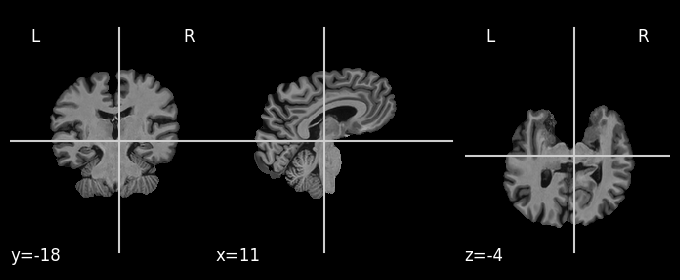

In [11]:
masked_t1 = nimg.math_img('a*b', a=t1_img, b=bm_img)
nplot.plot_anat(masked_t1)


### Functional Data

In [9]:
subject = "BLR03"

func_files = layout.get(subject=subject,
                        datatype='func', desc='preproc',
                       space='MNI152NLin2009cAsym',
                       extension="nii.gz",
                       return_type='file')

func_mask_files = layout.get(subject=subject,
                             datatype='func', suffix='mask',
                             desc='brain',
                             space='MNI152NLin2009cAsym',
                             extension="nii.gz",
                            return_type='file')

confound_files = layout.get(subject=subject,
                            datatype='func', task='rest',
                            desc='confounds',
                           extension="tsv",
                           return_type='file')

In [10]:
func_files

['/home/nimhans/projects/data/PD_SERB/test_data/derivatives/fmriprep/v20.2.7/output/fmriprep/sub-BLR03/ses-01/func/sub-BLR03_ses-01_task-rest_acq-multiband_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz']

In [11]:
func_mni = func_files[0]
func_mni_img = nimg.load_img(func_mni)


In [12]:
func_mni_img.shape


(97, 115, 97, 400)

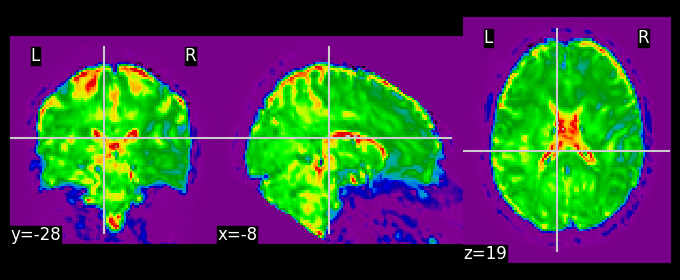

In [20]:
func_vol5 = func_mni_img.slicer[:,:,:,4]
nplot.plot_epi(func_vol5)

## Confound analysis

In [13]:
confound_file = confound_files[0]
print(confound_file)


/home/nimhans/projects/data/PD_SERB/test_data/derivatives/fmriprep/v20.2.7/output/fmriprep/sub-BLR03/ses-01/func/sub-BLR03_ses-01_task-rest_acq-multiband_run-1_desc-confounds_timeseries.tsv


In [14]:
confound_df = pd.read_csv(confound_file, delimiter='\t')
confound_df.head()

global_signal  global_signal_derivative1  global_signal_power2  \
0  182276.693007                        NaN          3.322479e+10   
1  181822.831808                -453.861199          3.305954e+10   
2  181718.795439                -104.036369          3.302172e+10   
3  181856.449610                 137.654170          3.307177e+10   
4  181201.587494                -654.862116          3.283402e+10   

   global_signal_derivative1_power2            csf  csf_derivative1  \
0                               NaN  277863.849560              NaN   
1                     205989.987788  276277.298370     -1586.551189   
2                      10823.565979  275220.187914     -1057.110457   
3                      18948.670633  275361.060908       140.872994   
4                     428844.390998  275657.425306       296.364398   

     csf_power2  csf_derivative1_power2   white_matter  \
0  7.720832e+10                     NaN  189378.431129   
1  7.632915e+10            2.517145e+06  189308.790506   
2  7.574615e+10            1.117483e+06  189561.276673   
3  7.582371e+10            1.984520e+04  189583.395137   
4  7.598702e+10            8.783186e+04  188770.863535   

   white_matter_derivative1  ...  motion_outlier46  motion_outlier47  \
0                       NaN  ...               0.0               0.0   
1                -69.640623  ...               0.0               0.0   
2                252.486167  ...               0.0               0.0   
3                 22.118464  ...               0.0               0.0   
4               -812.531602  ...               0.0               0.0   

   motion_outlier48  motion_outlier49  motion_outlier50  motion_outlier51  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   motion_outlier52  motion_outlier53  motion_outlier54  motion_outlier55  
0               0.0               0.0               0.0               0.0  
1               0.0               0.0               0.0               0.0  
2               0.0               0.0               0.0               0.0  
3               0.0               0.0               0.0               0.0  
4               0.0               0.0               0.0               0.0  

[5 rows x 1634 columns]

In [15]:
# Select confounds
confound_vars = ['trans_x','trans_y','trans_z',
                 'rot_x','rot_y','rot_z',
                 'global_signal',
                 'csf', 'white_matter']

# Get derivative column names
derivative_columns = ['{}_derivative1'.format(c) for c
                     in confound_vars]

print(derivative_columns)

final_confounds = confound_vars + derivative_columns

print(final_confounds)


['trans_x_derivative1', 'trans_y_derivative1', 'trans_z_derivative1', 'rot_x_derivative1', 'rot_y_derivative1', 'rot_z_derivative1', 'global_signal_derivative1', 'csf_derivative1', 'white_matter_derivative1']
['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z', 'global_signal', 'csf', 'white_matter', 'trans_x_derivative1', 'trans_y_derivative1', 'trans_z_derivative1', 'rot_x_derivative1', 'rot_y_derivative1', 'rot_z_derivative1', 'global_signal_derivative1', 'csf_derivative1', 'white_matter_derivative1']


In [16]:
confound_df = confound_df[final_confounds]
confound_df.head()


trans_x   trans_y   trans_z         rot_x     rot_y     rot_z  \
0  0.000000  0.000000  0.000000  0.000000e+00 -0.000000  0.000000   
1 -0.015585  0.118788 -0.046591 -6.621020e-05 -0.000000  0.000328   
2 -0.016960  0.036652 -0.006417 -2.299740e-04 -0.000479  0.000428   
3 -0.013301  0.028707 -0.013666  6.617440e-24 -0.000119  0.000428   
4 -0.022364  0.136877 -0.038277 -3.353620e-04 -0.000128  0.000296   

   global_signal            csf   white_matter  trans_x_derivative1  \
0  182276.693007  277863.849560  189378.431129                  NaN   
1  181822.831808  276277.298370  189308.790506            -0.015585   
2  181718.795439  275220.187914  189561.276673            -0.001375   
3  181856.449610  275361.060908  189583.395137             0.003659   
4  181201.587494  275657.425306  188770.863535            -0.009062   

   trans_y_derivative1  trans_z_derivative1  rot_x_derivative1  \
0                  NaN                  NaN                NaN   
1             0.118788            -0.046591          -0.000066   
2            -0.082136             0.040174          -0.000164   
3            -0.007946            -0.007249           0.000230   
4             0.108170            -0.024611          -0.000335   

   rot_y_derivative1  rot_z_derivative1  global_signal_derivative1  \
0                NaN                NaN                        NaN   
1           0.000000           0.000328                -453.861199   
2          -0.000479           0.000100                -104.036369   
3           0.000360           0.000000                 137.654170   
4          -0.000010          -0.000133                -654.862116   

   csf_derivative1  white_matter_derivative1  
0              NaN                       NaN  
1     -1586.551189                -69.640623  
2     -1057.110457                252.486167  
3       140.872994                 22.118464  
4       296.364398               -812.531602

In [17]:
confound_df.shape

(400, 18)

## Remove TRs

In [18]:
raw_func_img = nimg.load_img(func_mni)
print(raw_func_img.shape)

func_img = raw_func_img.slicer[:,:,:,4:]
func_img.shape


(97, 115, 97, 400)


(97, 115, 97, 396)

In [13]:
#Drop confound dummy TRs
drop_confound_df = confound_df.loc[4:]
print(drop_confound_df.shape) #number of rows should match that of the functional image
drop_confound_df.head()


(396, 18)


trans_x   trans_y   trans_z     rot_x     rot_y     rot_z  global_signal  \
4 -0.022364  0.136877 -0.038277 -0.000335 -0.000128  0.000296  181201.587494   
5 -0.022361  0.052298 -0.012557 -0.000469 -0.000025  0.000123  181314.618184   
6 -0.011216  0.014322  0.038216  0.000000  0.000383  0.000428  181632.912342   
7 -0.031908  0.080551 -0.024245  0.000000 -0.000068  0.000025  181162.658491   
8 -0.015501  0.081954 -0.001460  0.000000  0.000057  0.000133  180946.072063   

             csf   white_matter  trans_x_derivative1  trans_y_derivative1  \
4  275657.425306  188770.863535            -0.009062             0.108170   
5  276093.717438  189514.985414             0.000002            -0.084579   
6  276353.436987  189765.319096             0.011145            -0.037976   
7  275434.763646  189125.764863            -0.020693             0.066229   
8  275574.744858  189101.853242             0.016407             0.001404   

   trans_z_derivative1  rot_x_derivative1  rot_y_derivative1  \
4            -0.024611          -0.000335          -0.000010   
5             0.025720          -0.000134           0.000104   
6             0.050773           0.000469           0.000408   
7            -0.062461           0.000000          -0.000451   
8             0.022785           0.000000           0.000125   

   rot_z_derivative1  global_signal_derivative1  csf_derivative1  \
4          -0.000133                -654.862116       296.364398   
5          -0.000173                 113.030691       436.292132   
6           0.000305                 318.294157       259.719549   
7          -0.000403                -470.253850      -918.673341   
8           0.000108                -216.586428       139.981212   

   white_matter_derivative1  
4               -812.531602  
5                744.121880  
6                250.333681  
7               -639.554233  
8                -23.911621

## Brain parcellations

In [19]:
parcel_dir = '../resources/rois/'
atlas_yeo_2011 = datasets.fetch_atlas_yeo_2011(parcel_dir)


In [23]:
atlas_yeo_2011.keys()

dict_keys(['description', 'thin_7', 'thick_7', 'thin_17', 'thick_17', 'colors_7', 'colors_17', 'anat'])

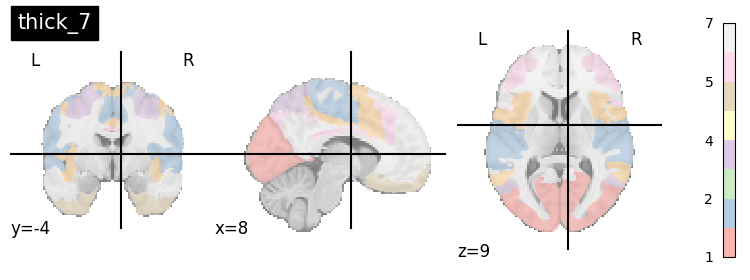

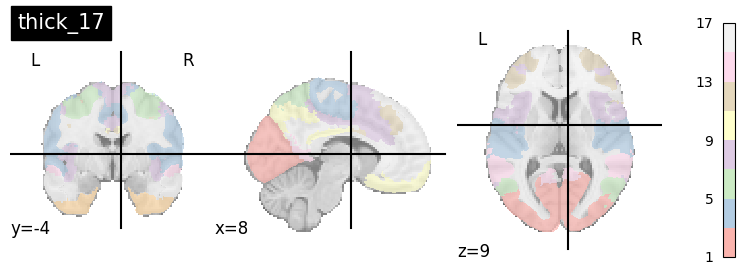

In [22]:
cut_coords = (8, -4, 9)
#Show a colorbar
colorbar=True
#Color scheme to show when viewing image
cmap='Pastel1'

#Plot all parcellation schemas referred to by atlas_yeo_2011
nplot.plot_roi(atlas_yeo_2011['thick_7'], cut_coords=cut_coords, colorbar=colorbar, cmap=cmap, title='thick_7')
nplot.plot_roi(atlas_yeo_2011['thick_17'], cut_coords=cut_coords, colorbar=colorbar, cmap=cmap, title='thick_17')


/home/nimhans/.local/lib/python3.10/site-packages/nilearn/regions/region_extractor.py:546: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  new_labels_img = new_img_like(labels_img, new_labels_data, affine=affine)


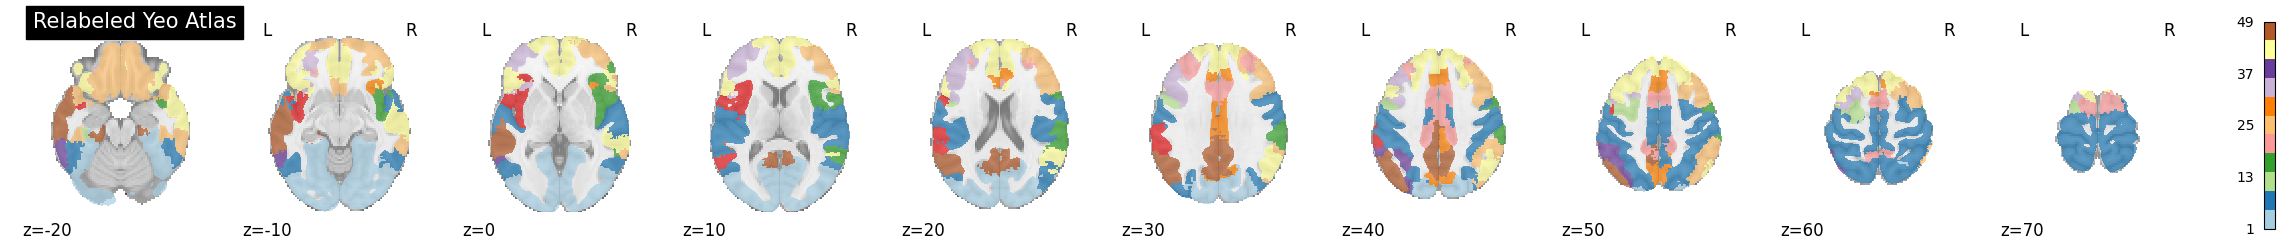

In [26]:
from nilearn.regions import connected_label_regions
atlas_yeo = atlas_yeo_2011['thick_7']

region_labels = connected_label_regions(atlas_yeo)
nplot.plot_roi(region_labels,
			cut_coords=(-20,-10,0,10,20,30,40,50,60,70),
			display_mode='z',
			colorbar=True,
			cmap='Paired',
			title='Relabeled Yeo Atlas')


In [46]:
region_labels.to_filename('../resources/rois/yeo_2011/Yeo_JNeurophysiol11_MNI152/relabeled_yeo_atlas.nii.gz')

## Select and Visualize single ROI

In [47]:
func_mni = func_files[0]
func_mni_img = nimg.load_img(func_mni)


print("Size of functional image:", func_img.shape)
print("Size of atlas image:", region_labels.shape)

resampled_yeo = nimg.resample_to_img(region_labels, func_mni_img, interpolation = 'nearest')

Size of functional image: (97, 115, 97, 396)
Size of atlas image: (256, 256, 256)


In [48]:
resampled_yeo.shape

(97, 115, 97)

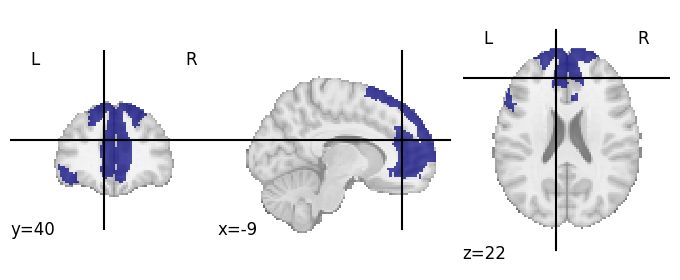

: 

In [50]:
# Make a mask for ROI 44
roi_mask = nimg.math_img('a == 44', a=resampled_yeo)  

# masked_resamp_yeo = nimg.math_img('a*b', a = roi_mask, b =)
# Visualize ROI
nplot.plot_roi(roi_mask)


